<a href="https://colab.research.google.com/github/onecme/dataMining/blob/main/TI09_ElyasRandiRenaldi_0110223277_Pratikum2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/dataset/500_Person_Gender_Height_Weight_Index_tugas1_dataMining.csv')

In [3]:
dataset

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [4]:
dataset['Height'].mean()

169.944

In [5]:
dataset['Height'].median()

170.5

In [6]:
dataset['Height'].mode()

,Height
0,188


In [7]:
q1 = dataset['Height'].quantile(0.25)
print("Q1 : ",q1)

q3 = dataset['Height'].quantile(0.75)
print("Q3 : ",q3)

iqr= q3-q1
print("IQR : ",iqr)

Q1 :  156.0
Q3 :  184.0
IQR :  28.0


<Axes: >

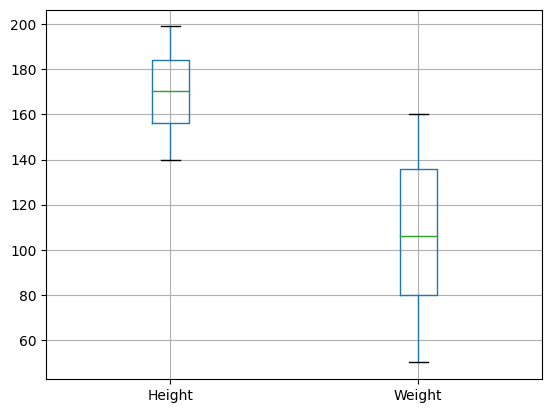

In [8]:
dataset.boxplot(column=['Height', 'Weight'])

In [9]:
outlier_data = {
    'Gender': ["Male", "Female", "Female", "Male"],
    'Height': [51, 155, 45, 160],
    'Weight': [33, 320, 30, 335],
    'Index': [2, 5, 2, 5]
}

outlier_df = pd.DataFrame(outlier_data)
dataset = pd.concat([dataset, outlier_df], ignore_index=True)

In [10]:
dataset

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
499,Male,173,131,5
500,Male,51,33,2
501,Female,155,320,5
502,Female,45,30,2


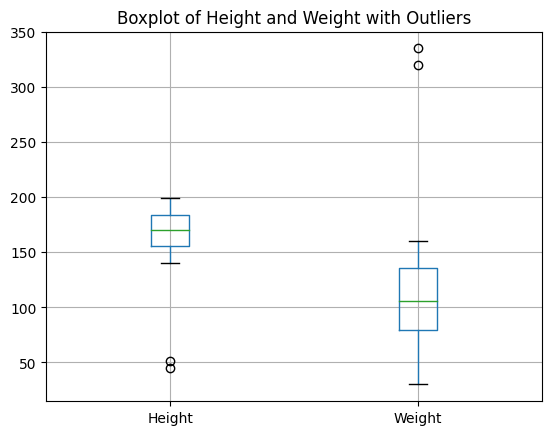

In [11]:
dataset.boxplot(column=['Height', 'Weight'])
plt.title("Boxplot of Height and Weight with Outliers")
plt.show()

In [12]:
q1 = dataset['Height'].quantile(0.25)
print("Q1 : ",q1)

q3 = dataset['Height'].quantile(0.75)
print("Q3 : ", q3)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = dataset[(dataset['Height'] < lower_bound ) | (dataset['Height'] > upper_bound)]

print("Outliers Height:")
print(outliers)

Q1 :  156.0
Q3 :  184.0
Outliers Height:
     Gender  Height  Weight  Index
500    Male      51      33      2
502  Female      45      30      2


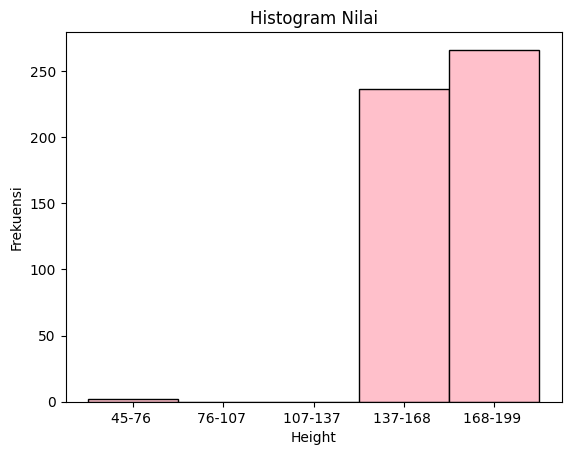

In [13]:
data_height = dataset["Height"]
# Buat histogram
n, bins, patches = plt.hist(data_height, bins=5, color='pink', edgecolor='black')

# Tambahkan Label
plt.title('Histogram Nilai')
plt.xlabel('Height')
plt.ylabel('Frekuensi')

# Tampilkan rentang frekuensi di sumbu x
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers, ['{:.0f}-{:.0f} ' .format(bins[i], bins[i+1]) for i in range(len(bins)-1)])

# Tampilkan histogram
plt.show()

In [14]:
# Mengidentifikasi baris outlier berdasarkan ciri-ciri yang unik

outliers_condition = ((dataset['Height'] > upper_bound) | (dataset['Height'] < lower_bound)) | (dataset['Weight'] < 30) | (dataset['Weight'] > 200)

# Drop baris yang memenuhi kondisi di atas (outliers)
dataset_cleaned = dataset[~outliers_condition]  # Tanda ~ untuk negasi (tidak termasuk kondisi outlier)

# Menampilkan data setelah penghapusan outliers
print(dataset_cleaned.tail())


     Gender  Height  Weight  Index
495  Female     150     153      5
496  Female     184     121      4
497  Female     141     136      5
498    Male     150      95      5
499    Male     173     131      5


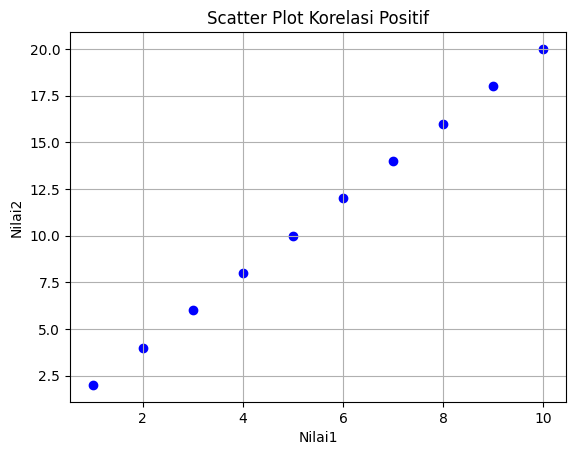

In [15]:
# Buat DataFrame contoh
data = {'Nilail': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Nilai2': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}

dataset = pd.DataFrame(data)

# Buat scatter plot
plt.scatter(dataset['Nilail'], dataset['Nilai2'], color='blue', marker='o')

# Tambahkan Label
plt.title('Scatter Plot Korelasi Positif')
plt.xlabel('Nilai1')
plt.ylabel('Nilai2')

# Tampilkan plot
plt.grid(True)
plt.show()

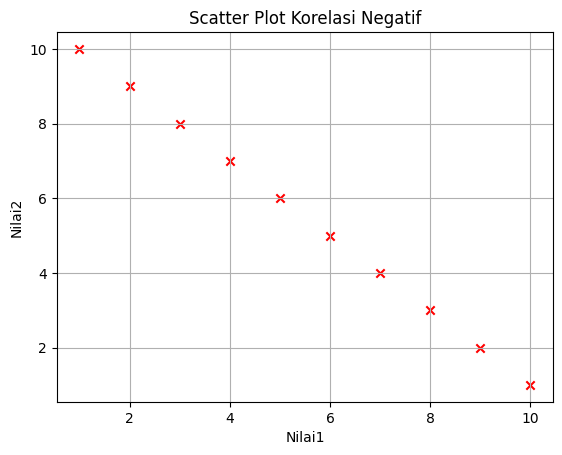

In [16]:
# Buat DataFrame contoh
data = {'Nilail': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Nilai2': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]}

dataset = pd.DataFrame(data)

# Buat scatter plot
plt.scatter(dataset['Nilail'], dataset['Nilai2'], color='red', marker='x')

# Tambahkan Label
plt.title('Scatter Plot Korelasi Negatif')
plt.xlabel('Nilai1')
plt.ylabel('Nilai2')

# Tampilkan plot
plt.grid(True)
plt.show()